In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# csv

In [1]:
file_path = 'output.csv'
#path = '/content/drive/MyDrive/DSC_Project/'

In [2]:
import pandas as pd

df = pd.read_csv(file_path)

print(df.head())

     id                                              title    year  \
0  1091  Preliminary Design of a Network Protocol Learn...  2013.0   
1  1388  Further Results on Independence in Direct-Prod...  2000.0   
2  1674  A methodology for the physically accurate visu...  2011.0   
3  1688  Comparison of GARCH, Neural Network and Suppor...  2009.0   
4  5411  COMPARING GNG3D AND QUADRIC ERROR METRICS METH...  2009.0   

                                         author_name  \
0  Makoto Satoh;Ryo Muramatsu;Mizue Kayama;Kazuno...   
1                                                NaN   
2                                   G. Beale;G. Earl   
3  Altaf Hossain;Faisal Zaman;M. Nasser;M. Mufakh...   
4                                    nan;nan;nan;nan   

                                          author_org  \
0  Shinshu University;Shinshu University;Shinshu ...   
1                                                NaN   
2  Archaeological Computing Research Group, Unive...   
3  Department of S

# for a small chunk of data

In [ ]:
# import pandas as pd

# sampled_chunks = []

# chunk_size = 100000

# for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
#     sampled_chunk = chunk.sample(frac=0.01, random_state=42)
#     sampled_chunks.append(sampled_chunk)

# df_sample = pd.concat(sampled_chunks)

# print(f'Sample size: {len(df_sample)} rows')
# print(df_sample.head())


Sample size: 48941 rows
             id                                              title    year  \
75721  68718114  Learning Problem-Solving Heuristics Through Pr...  1981.0   
80184  72661655  A Web-Enabled System for Storage and Retrieval...  2001.0   
19864  17817017  Improving phonotactic language recognition wit...  2007.0   
76699  69465617  Security Policy Management in Distributed Syst...  2002.0   
92991  84230433          LODr - A Linking Open Data Tagging System  2008.0   

                         author_name  \
75721                nan;nan;nan;nan   
80184        nan;nan;nan;nan;nan;nan   
19864  Wade Shen;Douglas A. Reynolds   
76699                    nan;nan;nan   
92991                            NaN   

                                              author_org  \
75721                                    nan;nan;nan;nan   
80184                            nan;nan;nan;nan;nan;nan   
19864  massachusetts institute of technology;massachu...   
76699                     

In [ ]:
#df.to_csv(path + 'sample_dsc.csv', index=False)

In [3]:
#df = df_sample.copy()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894081 entries, 0 to 4894080
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   title            object 
 2   year             float64
 3   author_name      object 
 4   author_org       object 
 5   author_id        object 
 6   n_citation       float64
 7   doc_type         object 
 8   reference_count  float64
 9   references       object 
 10  venue_id         float64
 11  venue_name       object 
 12  venue_type       object 
 13  doi              object 
 14  keyword          object 
 15  volume           float64
 16  issue            float64
 17  publisher        object 
 18  weight           object 
 19  indexed_keyword  object 
 20  inverted_index   object 
dtypes: float64(6), int64(1), object(14)
memory usage: 784.1+ MB
None


In [4]:
# statistics for numerical columns
print(df.describe())


                 id          year    n_citation  reference_count  \
count  4.894081e+06  4.894072e+06  3.538030e+06     3.777107e+06   
mean   2.122643e+09  2.009149e+03  2.324065e+01     1.206324e+01   
std    6.532389e+08  8.937085e+00  1.356659e+02     1.214674e+01   
min    1.091000e+03  1.800000e+03  1.000000e+00     1.000000e+00   
25%    1.996668e+09  2.005000e+03  2.000000e+00     4.000000e+00   
50%    2.115706e+09  2.011000e+03  6.000000e+00     9.000000e+00   
75%    2.561952e+09  2.016000e+03  1.700000e+01     1.600000e+01   
max    3.009038e+09  2.020000e+03  4.832700e+04     1.812000e+03   

           venue_id        volume         issue  
count  4.371968e+06  2.183176e+06  1.618242e+06  
mean   1.046619e+09  3.136716e+07  8.040937e+08  
std    9.591170e+08  1.751658e+10  8.869199e+10  
min    1.820010e+05 -1.100000e+01 -7.700000e+01  
25%    1.231448e+08  1.100000e+01  2.000000e+00  
50%    1.138692e+09  2.800000e+01  3.000000e+00  
75%    1.194094e+09  6.100000e+01  6.

In [5]:
# missing values
print(df.isnull().sum())

id                       0
title                    0
year                     9
author_name         268382
author_org          268383
author_id           268382
n_citation         1356051
doc_type            499441
reference_count    1116974
references         1116974
venue_id            522113
venue_name          522113
venue_type          522113
doi                 973142
keyword              16680
volume             2710905
issue              3275839
publisher           759904
weight               16680
indexed_keyword     661571
inverted_index      661571
dtype: int64


# Handling missing values

In [6]:
df['n_citation'].fillna(0, inplace=True) 
df['doc_type'].fillna('Unknown', inplace=True) 
df['reference_count'].fillna(0, inplace=True)  
df['references'] = df['references'].apply(lambda x: [] if pd.isnull(x) else x) 
df['venue_name'].fillna('Not Specified', inplace=True) 
df['keyword'].fillna('No Keywords', inplace=True) 
df['doi'].fillna('No DOI', inplace=True) 
df['publisher'].fillna('Unknown Publisher', inplace=True)  

# Dropping columns with a high percentage of missing values
df_cleaned = df.drop(columns=['volume', 'issue', 'weight']) 

print(df_cleaned.isnull().sum())


id                      0
title                   0
year                    9
author_name        268382
author_org         268383
author_id          268382
n_citation              0
doc_type                0
reference_count         0
references              0
venue_id           522113
venue_name              0
venue_type         522113
doi                     0
keyword                 0
publisher               0
indexed_keyword    661571
inverted_index     661571
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# df['year'] = pd.to_numeric(df['year'], errors='coerce')
# df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce')
# df['reference_count'] = pd.to_numeric(df['reference_count'], errors='coerce')

# df['n_citation'].fillna(0, inplace=True)
# df['reference_count'].fillna(0, inplace=True)
# df['year'].fillna(df['year'].median(), inplace=True)
# df['doc_type'].fillna('Unknown', inplace=True)

<ipython-input-33-35239633257e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['n_citation'].fillna(0, inplace=True)
<ipython-input-33-35239633257e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Analyzing the Distribution of Papers Over the Years

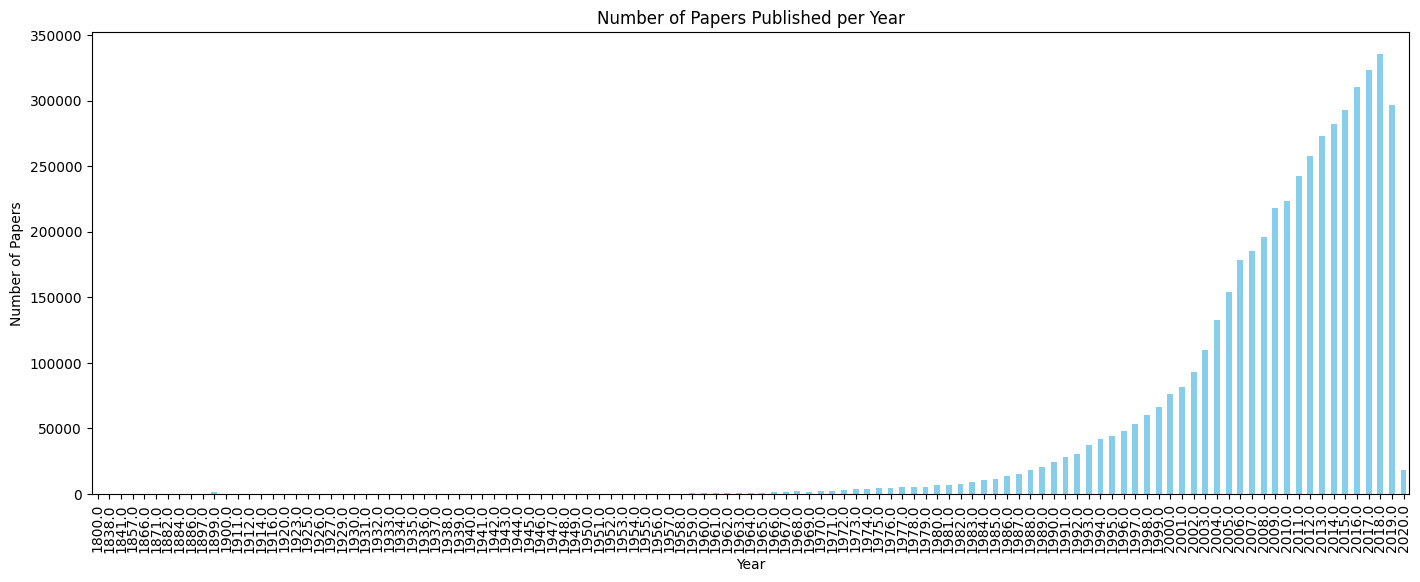

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,6))
df_cleaned.groupby('year').size().plot(kind='bar', color='skyblue')
plt.title('Number of Papers Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.show()


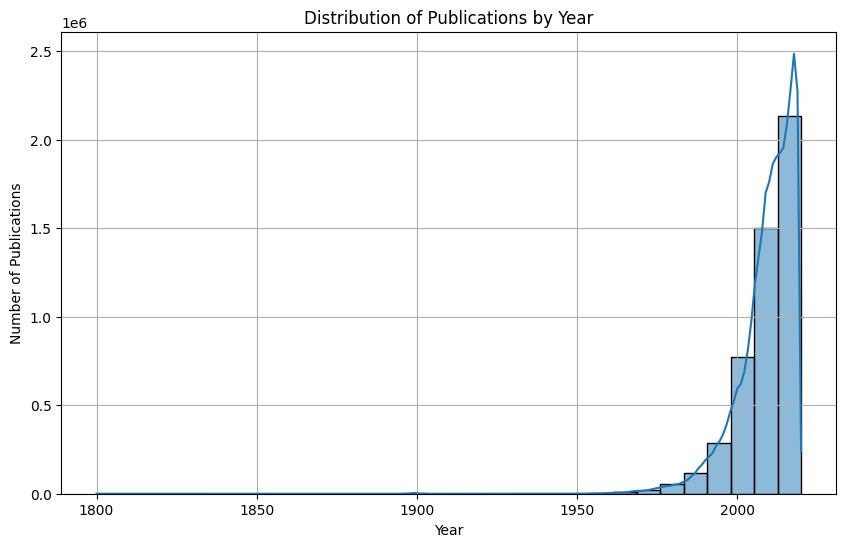

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribution of Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

Exploring the distribution of the number of citations to understand how many papers have high or low citation counts.

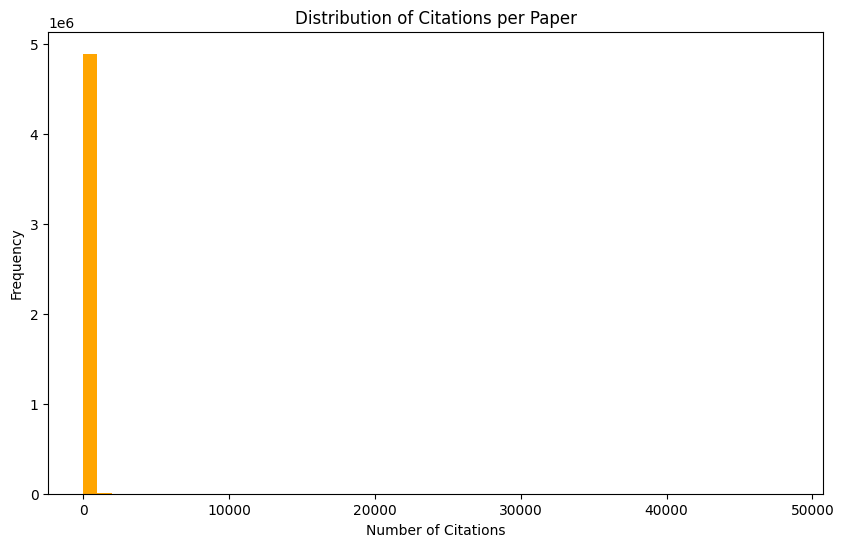

                                                     title  n_citation
4696136           The Mathematical Theory of Communication     48327.0
4630907  Genetic algorithms in search, optimization, an...     44175.0
4092588                                         Fuzzy sets     42437.0
2937610  Distinctive Image Features from Scale-Invarian...     35541.0
4088311                                     Random Forests     34741.0
1131333                        Applied Logistic Regression     32053.0
2691785      LIBSVM: A library for support vector machines     31047.0
2729388          The Nature of Statistical Learning Theory     28886.0
688041   Perceived usefulness, perceived ease of use, a...     25855.0
2313078                            Support-Vector Networks     22276.0


In [13]:
plt.figure(figsize=(10,6))
df_cleaned['n_citation'].plot(kind='hist', bins=50, color='orange')
plt.title('Distribution of Citations per Paper')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.show()

# Top 10 most cited papers
top_cited_papers = df_cleaned[['title', 'n_citation']].sort_values(by='n_citation', ascending=False).head(10)
print(top_cited_papers)


In [42]:
top_cited_papers = df[['title', 'n_citation']].sort_values(by='n_citation', ascending=False).head(10)
top_cited_papers

,title,n_citation
4696136,The Mathematical Theory of Communication,48327.0
4630907,"Genetic algorithms in search, optimization, an...",44175.0
4092588,Fuzzy sets,42437.0
2937610,Distinctive Image Features from Scale-Invarian...,35541.0
4088311,Random Forests,34741.0
1131333,Applied Logistic Regression,32053.0
2691785,LIBSVM: A library for support vector machines,31047.0
2729388,The Nature of Statistical Learning Theory,28886.0
688041,"Perceived usefulness, perceived ease of use, a...",25855.0
2313078,Support-Vector Networks,22276.0


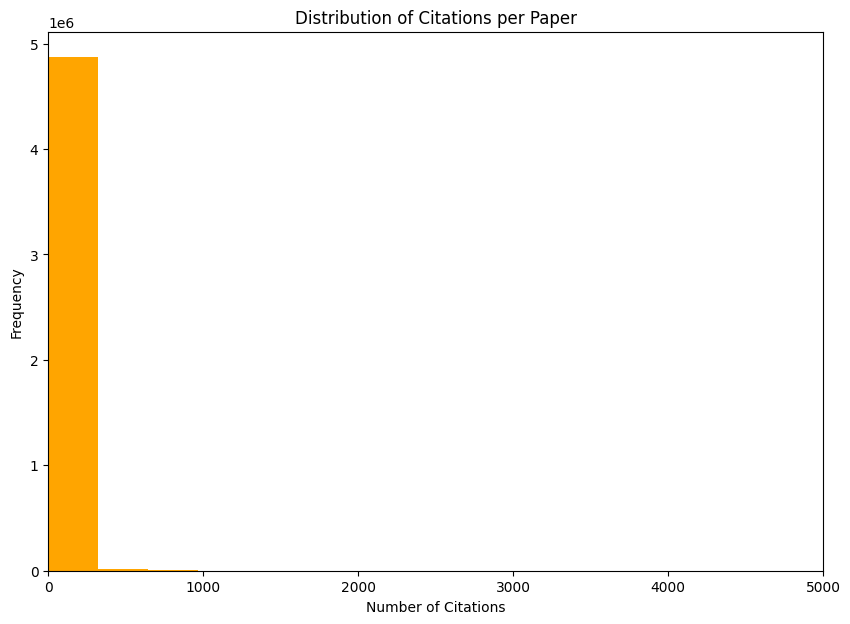

                                                     title  n_citation
4696136           The Mathematical Theory of Communication     48327.0
4630907  Genetic algorithms in search, optimization, an...     44175.0
4092588                                         Fuzzy sets     42437.0
2937610  Distinctive Image Features from Scale-Invarian...     35541.0
4088311                                     Random Forests     34741.0
1131333                        Applied Logistic Regression     32053.0
2691785      LIBSVM: A library for support vector machines     31047.0
2729388          The Nature of Statistical Learning Theory     28886.0
688041   Perceived usefulness, perceived ease of use, a...     25855.0
2313078                            Support-Vector Networks     22276.0


In [30]:
plt.figure(figsize=(10, 7))
df_cleaned['n_citation'].plot(kind='hist', bins=150, color='orange')  
plt.xlim(0, 5000)  
plt.title('Distribution of Citations per Paper')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.show()

top_cited_papers = df_cleaned[['title', 'n_citation']].sort_values(by='n_citation', ascending=False).head(10)
print(top_cited_papers)



Checking how different document types (e.g., Conference, Journal) are distributed in the dataset.

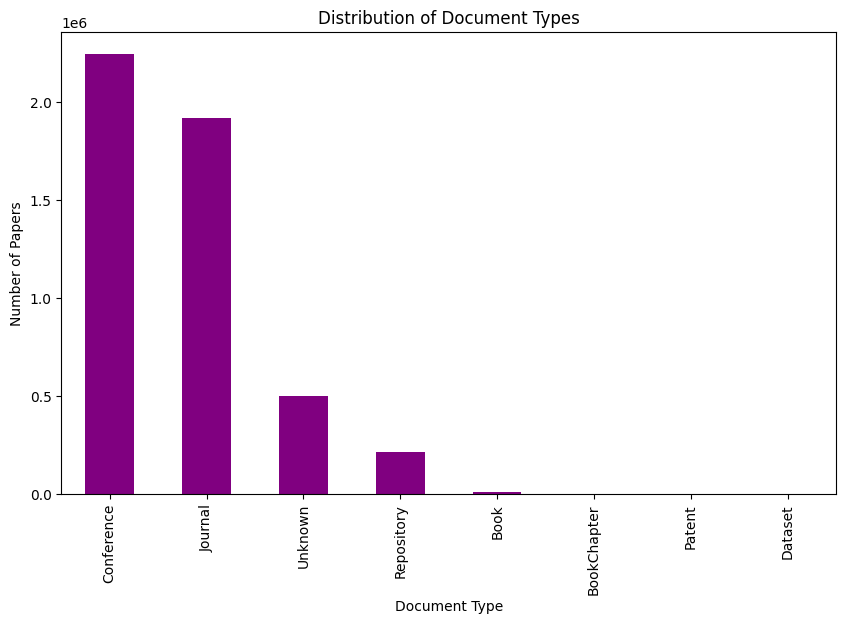

In [19]:
doc_type_counts = df_cleaned['doc_type'].value_counts()

plt.figure(figsize=(10,6))
doc_type_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Document Types')
plt.xlabel('Document Type')
plt.ylabel('Number of Papers')
plt.show()


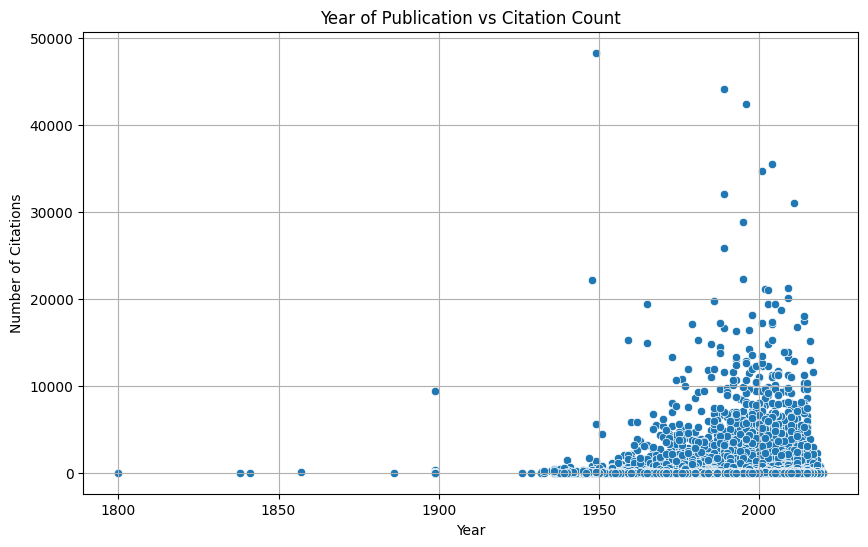

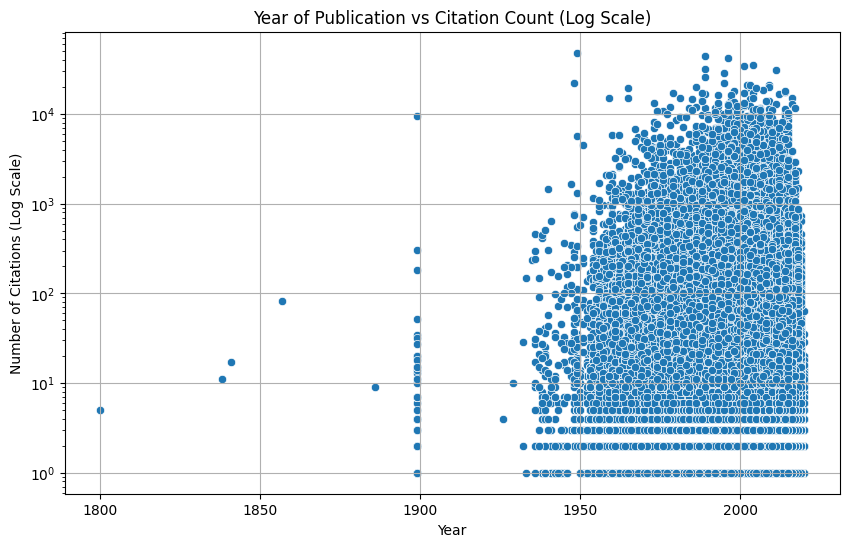

In [43]:
filtered_citations = df[df['n_citation'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='n_citation', data=filtered_citations)
plt.title('Year of Publication vs Citation Count')
plt.xlabel('Year')
plt.ylabel('Number of Citations')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='n_citation', data=filtered_citations)
plt.yscale('log')
plt.title('Year of Publication vs Citation Count (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Number of Citations (Log Scale)')
plt.grid(True)
plt.show()


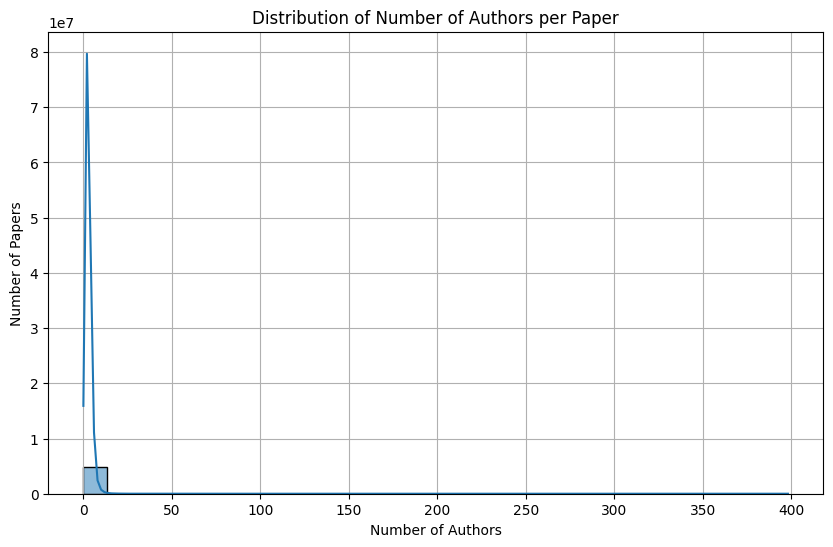

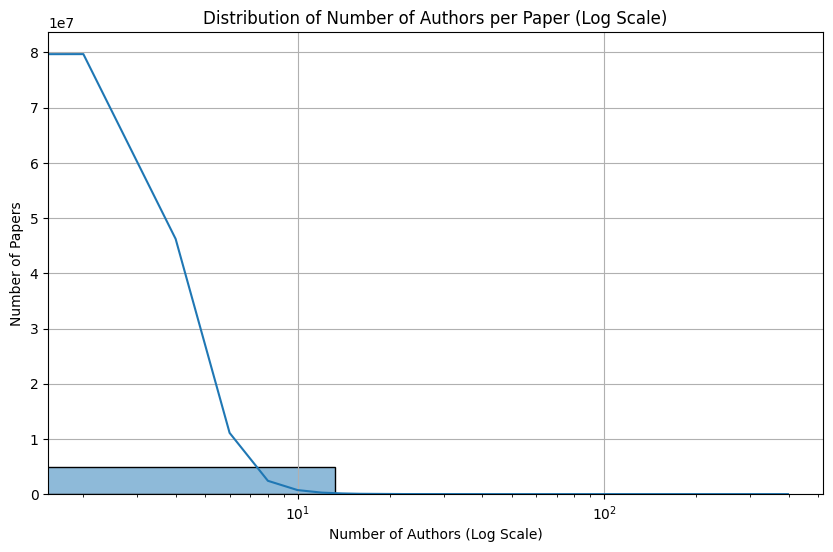

In [31]:
df['author_count'] = df['author_name'].apply(lambda x: len(str(x).split(';')) if pd.notnull(x) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df['author_count'], bins=30, kde=True)
plt.title('Distribution of Number of Authors per Paper')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['author_count'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribution of Number of Authors per Paper (Log Scale)')
plt.xlabel('Number of Authors (Log Scale)')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

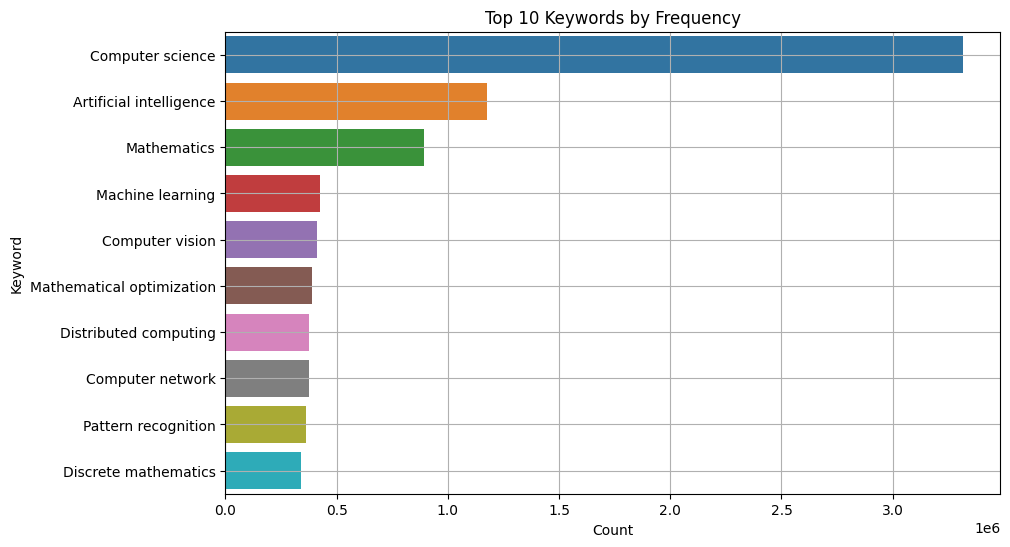

In [32]:
from collections import Counter

keywords = df['keyword'].dropna().str.split(';').explode()
top_keywords = Counter(keywords).most_common(10)

top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Keyword', data=top_keywords_df)
plt.title('Top 10 Keywords by Frequency')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.grid(True)
plt.show()


Identifing the top publishers based on the number of papers they have published.

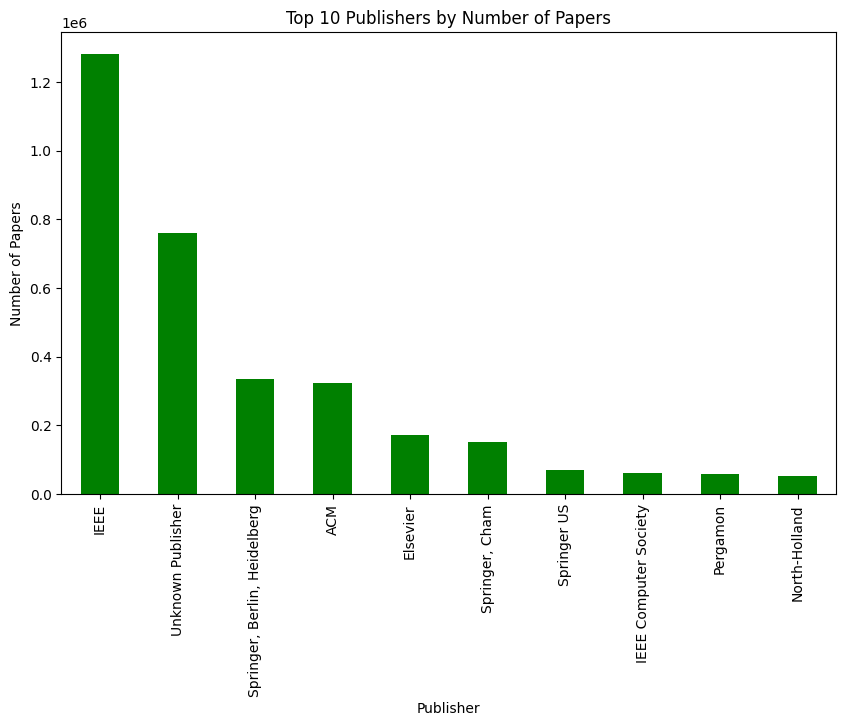

In [33]:
top_publishers = df_cleaned['publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_publishers.plot(kind='bar', color='green')
plt.title('Top 10 Publishers by Number of Papers')
plt.xlabel('Publisher')
plt.ylabel('Number of Papers')
plt.show()

Analysis of References: to examine how many references each paper contains.

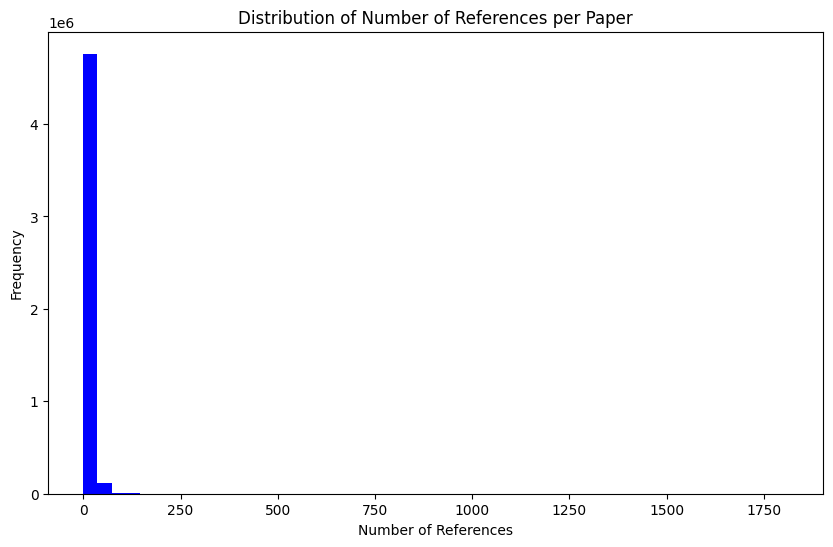

In [34]:
df_cleaned['reference_count'] = df_cleaned['references'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

plt.figure(figsize=(10,6))
df_cleaned['reference_count'].plot(kind='hist', bins=50, color='blue')
plt.title('Distribution of Number of References per Paper')
plt.xlabel('Number of References')
plt.ylabel('Frequency')
plt.show()


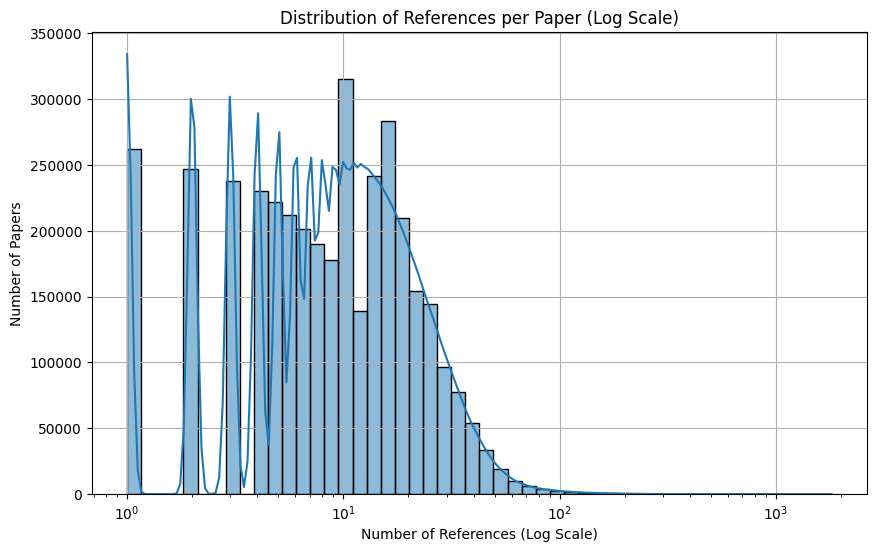

In [35]:
filtered_references = df[df['reference_count'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_references['reference_count'], bins=50, kde=True, log_scale=(True, False))
plt.title('Distribution of References per Paper (Log Scale)')
plt.xlabel('Number of References (Log Scale)')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

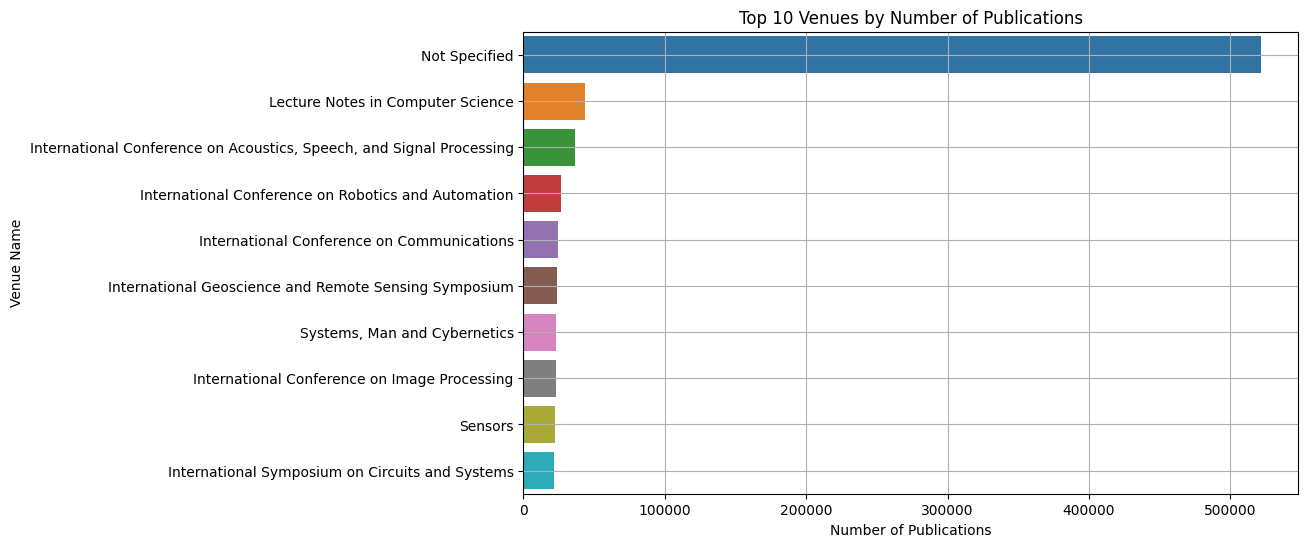

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title('Top 10 Venues by Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Venue Name')
plt.grid(True)
plt.show()

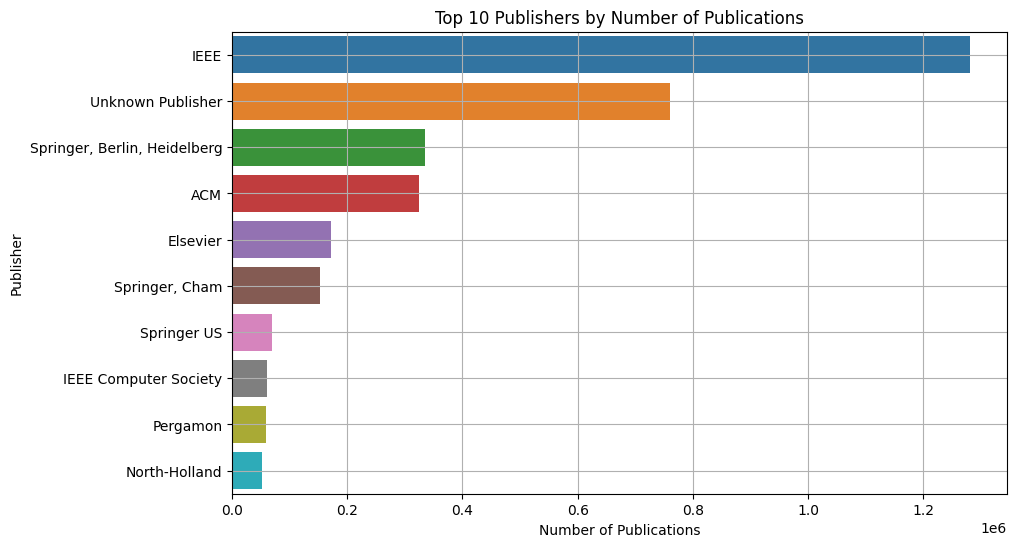

In [38]:
top_venues = df['venue_name'].value_counts().head(10)
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Publisher')
plt.grid(True)
plt.show()

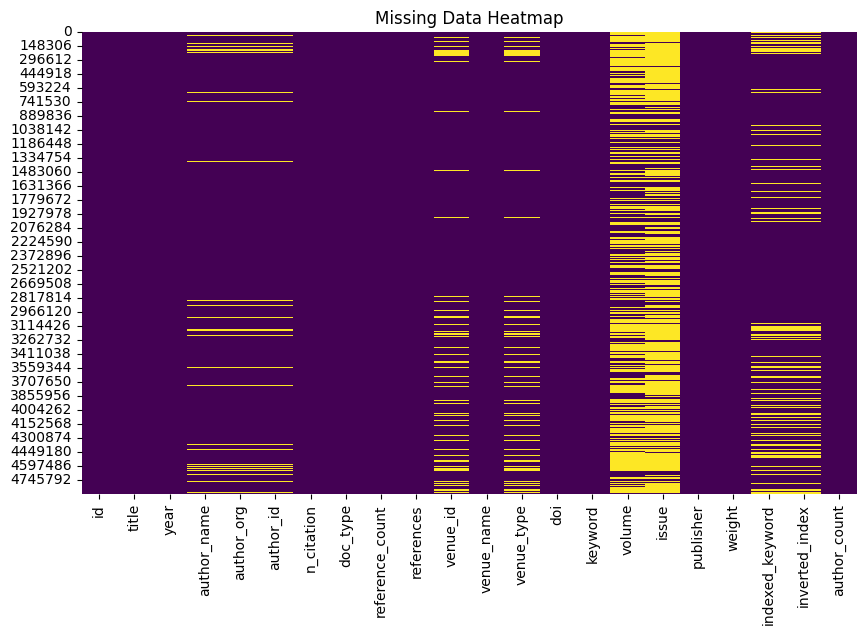

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

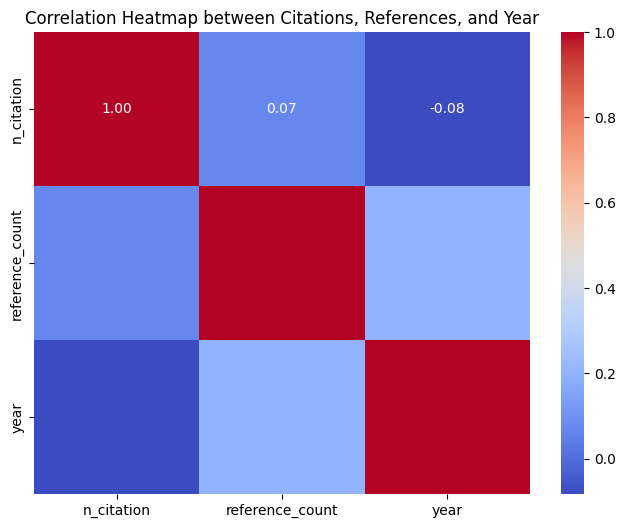

In [41]:
numeric_cols = ['n_citation', 'reference_count', 'year']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Citations, References, and Year')
plt.show()
